In [1]:
import featuremap

import warnings
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)

/Users/uqyyao4/opt/anaconda3/envs/featmap/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Download the synthetic data by BEELINE model.

In [ ]:

# !curl -o BEELINE-data.zip https://zenodo.org/records/3701939/files/BEELINE-data.zip?download=1

# !unzip BEELINE-data.zip



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  250M  100  250M    0     0  1885k      0  0:02:15  0:02:15 --:--:-- 1675k  250M    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     00  250M    0 1412k    0     0   300k      0  0:14:13  0:00:04  0:14:09  300k
Archive:  BEELINE-data.zip
   creating: BEELINE-data/
   creating: BEELINE-data/inputs/
   creating: BEELINE-data/inputs/scRNA-Seq/
   creating: BEELINE-data/inputs/scRNA-Seq/mHSC-L/
  inflating: BEELINE-data/inputs/scRNA-Seq/mHSC-L/ExpressionData.csv  
  inflating: BEELINE-data/inputs/scRNA-Seq/mHSC-L/GeneOrdering.csv  
  inflating: BEELINE-data/inputs/scRNA-Seq/mHSC-L/PseudoTime.csv  
   creating: BEELINE-data/inputs/scRNA-Seq/mESC/
  inflating: BEELINE-data/inputs/scRNA-Seq/mESC/PseudoTime.csv  
  inflating: BEELINE-data/inputs/scRNA-Seq/mESC/ExpressionData.csv  
  inflating: BEELINE-data/inputs/scRNA-

Read the expression data and pseudotime.

In [3]:
import pandas as pd
# BF data
data = pd.read_csv('./BEELINE-data/inputs/Synthetic/dyn-BF/dyn-BF-5000-1/ExpressionData.csv', index_col=0).T
data_pseudotime = pd.read_csv('./BEELINE-data/inputs/Synthetic/dyn-BF/dyn-BF-5000-1/Pseudotime.csv', index_col=0)
# replace Nan with 0
data_pseudotime.fillna(0, inplace=True)
# sum PseudoTime1 and PseudoTime2 
data_pseudotime = data_pseudotime.sum(axis=1)




<Axes: >

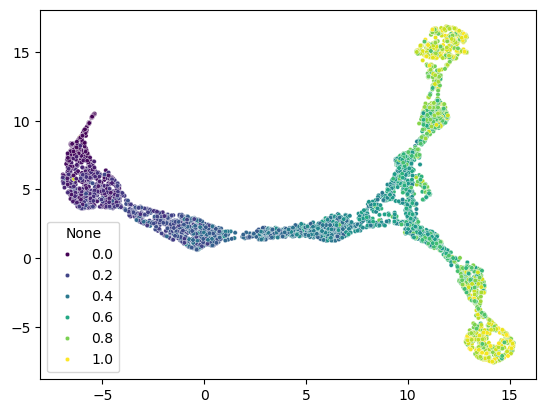

In [4]:
import umap
emb_umap = umap.UMAP().fit_transform(data)
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=emb_umap[:, 0], y=emb_umap[:, 1],hue=data_pseudotime, palette='viridis', s=10)

FeatureMAP expression embedding.

In [5]:
# from featuremap import featuremap_
import importlib
# importlib.reload(featuremap_)

emb_featuremap = featuremap.FeatureMAP(
                    random_state=42,
                    output_variation=False,
                    verbose=True,
                    ).fit(data)

FeatureMAP(random_state=42, verbose=True)
Tue Jun  4 12:07:23 2024 Construct fuzzy simplicial set
Tue Jun  4 12:07:23 2024 Finding Nearest Neighbors
Tue Jun  4 12:07:23 2024 Building RP forest with 9 trees
Tue Jun  4 12:07:23 2024 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	Stopping threshold met -- exiting after 2 iterations
Tue Jun  4 12:07:23 2024 Finished Nearest Neighbor Search
Tue Jun  4 12:07:24 2024 Construct embedding
Tue Jun  4 12:07:25 2024 Computing tangent space
Tue Jun  4 12:08:16 2024 Average over 19 times
Tue Jun  4 12:08:17 2024 Average time is 1.4428002834320068
Tue Jun  4 12:08:17 2024 Tangent_space_approximation time is 52.681966066360474
Tue Jun  4 12:08:17 2024 Tangent space embedding


/Users/uqyyao4/opt/anaconda3/envs/featmap/lib/python3.9/site-packages/numba/core/decorators.py:250: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


Tue Jun  4 12:08:35 2024 Tangent_space_embedding time is 17.464701175689697
Tue Jun  4 12:08:35 2024 Start optimizing layout


Epochs completed: 100%| ██████████ 600/600 [00:45]

Tue Jun  4 12:09:20 2024 Optimize layout time is 45.4047269821167
Tue Jun  4 12:09:20 2024 Finished embedding


In [6]:
from featuremap import features
import importlib
importlib.reload(features)

adata = features.create_adata(X=data, emb_featuremap=emb_featuremap)

mu is not added to adata


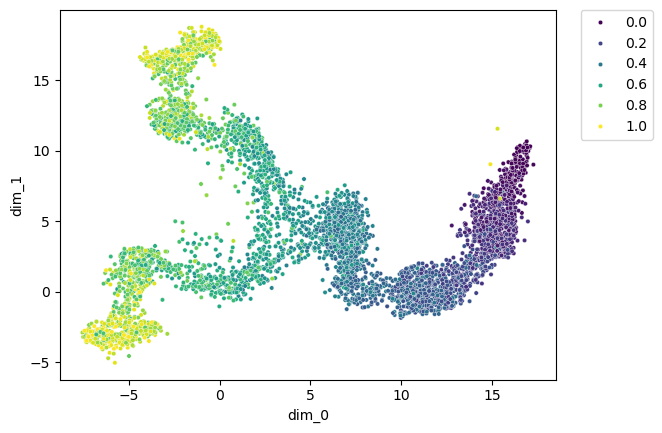

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(dpi=100)

embedding_df = pd.DataFrame(adata.obsm["X_featmap"], index=adata.obs_names, columns=['dim_0', 'dim_1'])
embedding_df['pseudotime'] = data_pseudotime
sns.scatterplot(x='dim_0', y='dim_1',hue='pseudotime', data=embedding_df, palette='viridis', s=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



FeatureMAP variation embedding.

In [8]:
# from featuremap import featuremap_
# import importlib
# importlib.reload(featuremap_)

emb_featuremap = featuremap.FeatureMAP(
                    random_state=42,
                    output_variation=True,
                    min_dist=0.5,
                    # verbose=True,
                    threshold=0.9
                    ).fit_transform(data)

adata.obsm["X_featmap_v"] = emb_featuremap

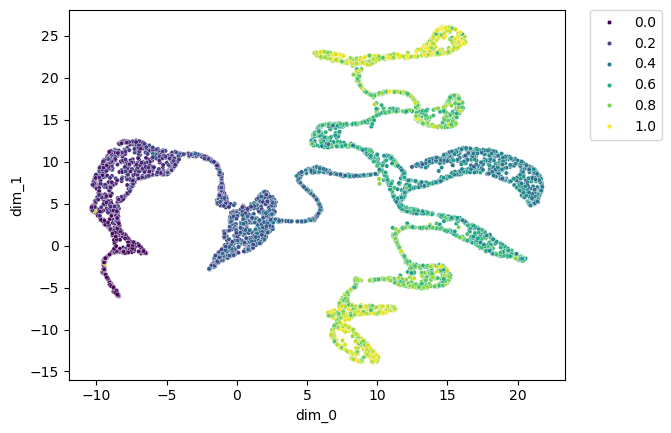

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(dpi=100)

embedding_df = pd.DataFrame(adata.obsm["X_featmap_v"], index=data.index, columns=['dim_0', 'dim_1'])
embedding_df['pseudotime'] = data_pseudotime
sns.scatterplot(x='dim_0',y='dim_1', hue='pseudotime', data=embedding_df, palette='viridis', s=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [10]:
# from featuremap import featuremap_
# import importlib
# importlib.reload(featuremap_)

emb_featuremap = featuremap.FeatureMAP(
                    n_components=3,
                    random_state=42,
                    output_variation=True,
                    min_dist=0.5,
                    # verbose=True,
                    threshold=0.9
                    ).fit_transform(data)

adata.obsm["X_featmap_v_3d"] = emb_featuremap

In [11]:
import plotly   
importlib.reload(plotly)
# importlib.reload(nbformat)
import plotly.express as px
fig_3d = px.scatter_3d(
    emb_featuremap, 
    x=0, y=1, z=2,
    color=data_pseudotime, 
    # labels={'color': 'species'}
    color_continuous_scale='viridis',
    # color_discrete_sequence=[ 'orange', 'blue']
)
fig_3d.update_traces(marker_size=2) # Modify the point size
fig_3d.update_layout(
    autosize=False,
    width=500,
    height=500,
)
fig_3d.show()

# save the plot 
# fig_3d.write_html("3d_plot.html")

Plot features.

In [12]:
from featuremap import features
import importlib
importlib.reload(features)

# Starting point index
# Randomly select a starting point by cells with small pseudotime
import numpy as np
start_point_index = np.random.choice(np.where(data_pseudotime < 0.1)[0])
features.pseudotime_mst(adata, 42, start_point_index)


Plotting g1...
Start matrix multiplication
Finish matrix multiplication in 0.0013539791107177734


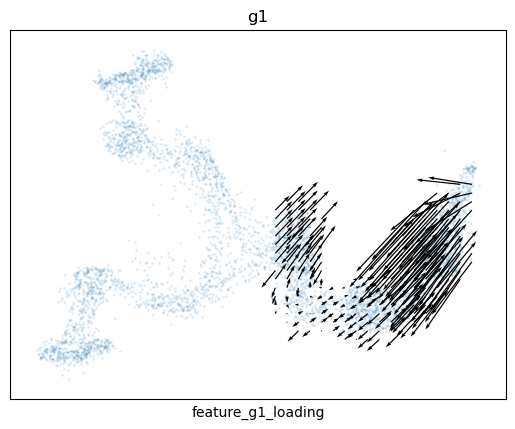

Plotting g2...
Start matrix multiplication
Finish matrix multiplication in 0.0004849433898925781


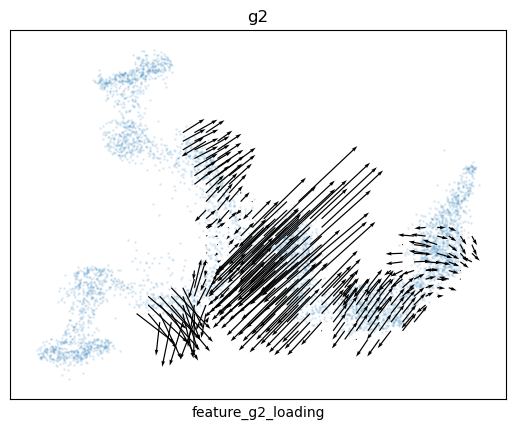

Plotting g3...
Start matrix multiplication
Finish matrix multiplication in 0.0005280971527099609


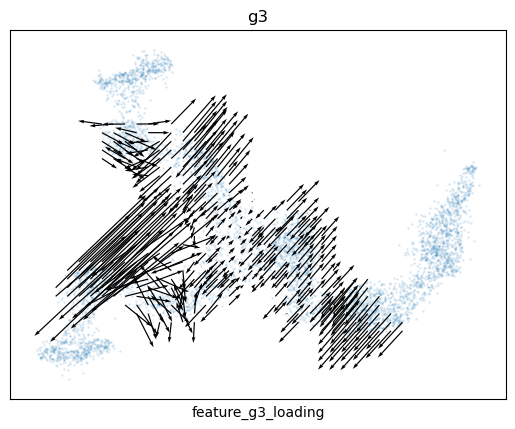

Plotting g4...
Start matrix multiplication
Finish matrix multiplication in 0.0007011890411376953


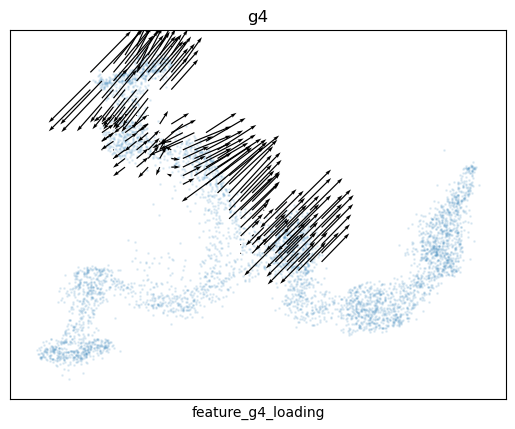

Plotting g6...
Start matrix multiplication
Finish matrix multiplication in 0.0006520748138427734


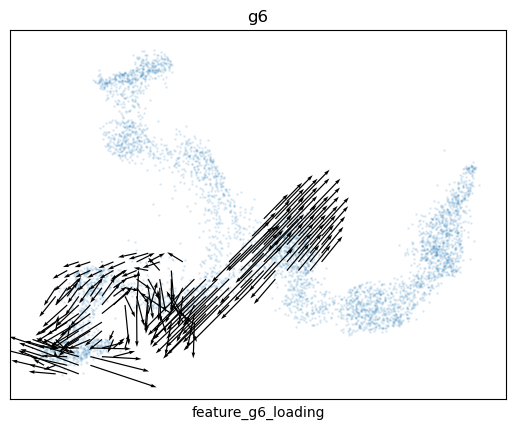

Plotting g7...
Start matrix multiplication
Finish matrix multiplication in 0.0006101131439208984


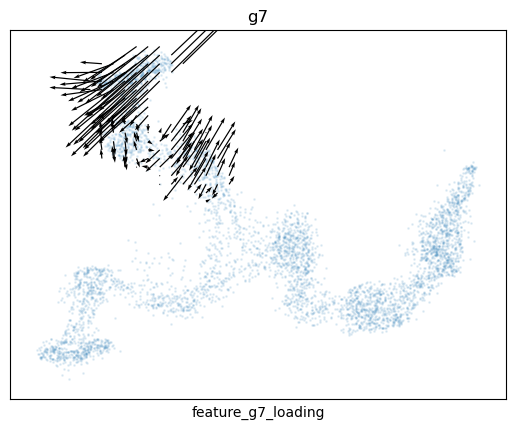

Plotting g8...
Start matrix multiplication
Finish matrix multiplication in 0.0006129741668701172


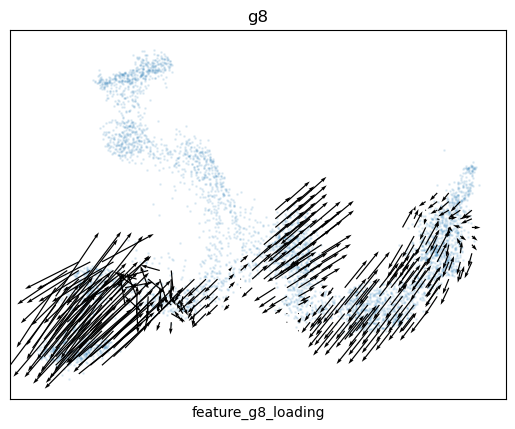

<Figure size 640x480 with 0 Axes>

In [19]:
from featuremap import features
import importlib
importlib.reload(features)

from featuremap.features import feature_projection, plot_one_feature
feature = data.columns

# adata.obs['feat_pseudotime'] = data_pseudotime

for f in feature:
    print(f'Plotting {f}...')
    feature_projection(adata, feature=f)
    plot_one_feature(adata, feature=f, ratio=0.5, density=0.8, embedding='X_featmap', pseudotime='feat_pseudotime', pseudotime_adjusted=False)    


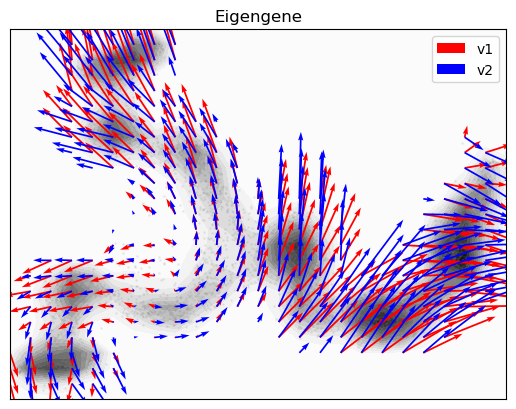

In [14]:
from featuremap import features
import importlib
importlib.reload(features)

features.plot_gauge_both(adata, density=0.5,  embedding='X_featmap',)

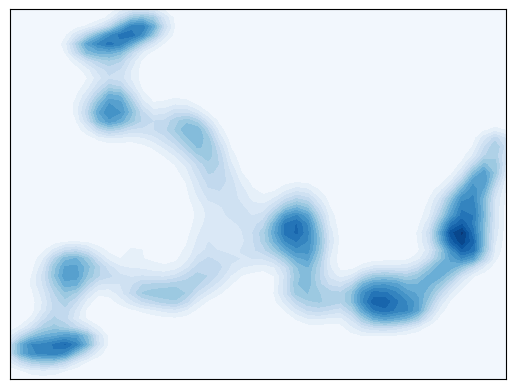

<Figure size 640x480 with 0 Axes>

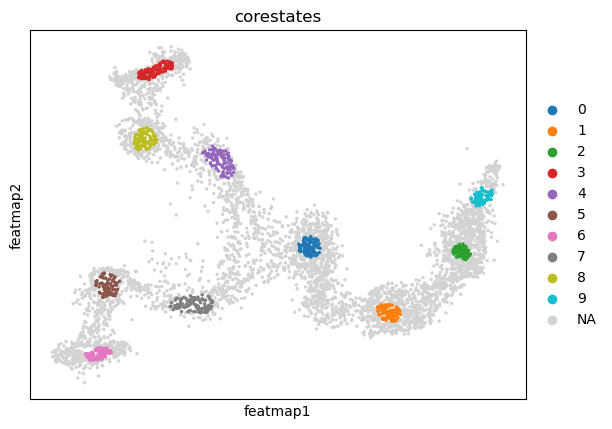

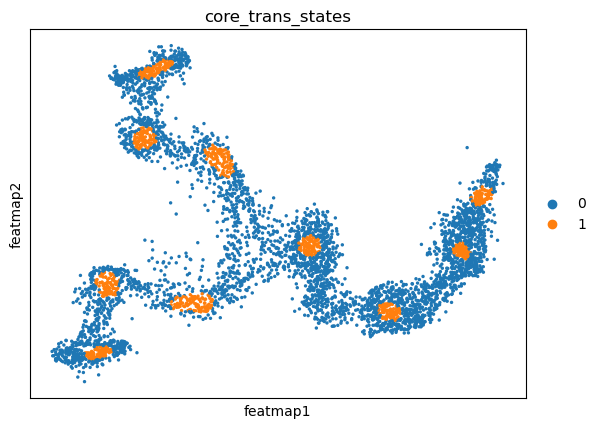

In [15]:
##################################
# Contour plot to show the density
######################################
from featuremap import core_transition_state
import importlib
importlib.reload(core_transition_state)

from featuremap.core_transition_state import plot_density
plot_density(adata)

#%%
#######################################################
# Compute core-states based on clusters
#########################################################

from featuremap.core_transition_state import core_transition_state
core_transition_state(adata)



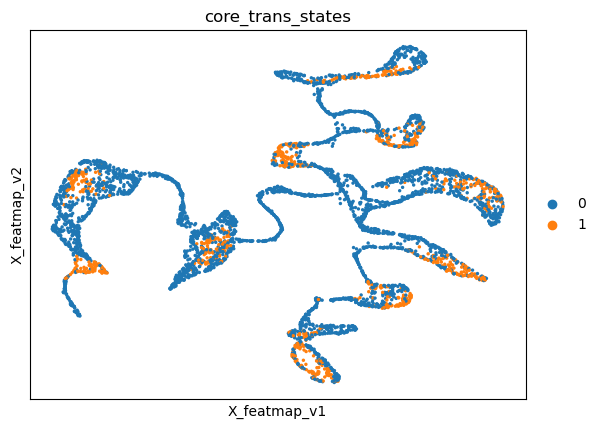

In [16]:
import scanpy as sc
sc.pl.embedding(adata, basis='X_featmap_v', color='core_trans_states',  )

In [17]:

core_trans_states = adata.obs['core_trans_states'].values
import plotly   
importlib.reload(plotly)
# importlib.reload(nbformat)
import plotly.express as px
fig_3d = px.scatter_3d(
    emb_featuremap, 
    x=0, y=1, z=2,
    color=core_trans_states, 
    # labels={'color': 'species'}
    # color_continuous_scale='viridis',
    color_discrete_sequence=[  'blue', 'orange',]
)
fig_3d.update_traces(marker_size=2) # Modify the point size
fig_3d.update_layout(
    autosize=False,
    width=500,
    height=500,
)
fig_3d.show()

# save the plot
# fig_3d.write_html("3d_plot_core_trans_states.html")